# Output smoothing experiments

The goal of smoothing of the output signal is to make training the neural network easier.

To run this notebook, please put the output csv file in the same directory. The file can be downloaded from https://drive.google.com/file/d/1brOsOIH-ST1KtvKJ-XbQeGar3D7GU705/view?usp=sharing

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.signal import spectrogram, convolve
import numpy as np

In [6]:
df = pd.read_csv('15-10-07_naturalscene_y_train_standard_scaled.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359802 entries, 0 to 359801
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       359802 non-null  float64
 1   1       359802 non-null  float64
 2   2       359802 non-null  float64
 3   3       359802 non-null  float64
 4   4       359802 non-null  float64
 5   5       359802 non-null  float64
 6   6       359802 non-null  float64
 7   7       359802 non-null  float64
 8   8       359802 non-null  float64
dtypes: float64(9)
memory usage: 24.7 MB


Let's work on a subset due to visualization

In [18]:
subset_size = 3000
subset_df = df[:subset_size]

<Axes: >

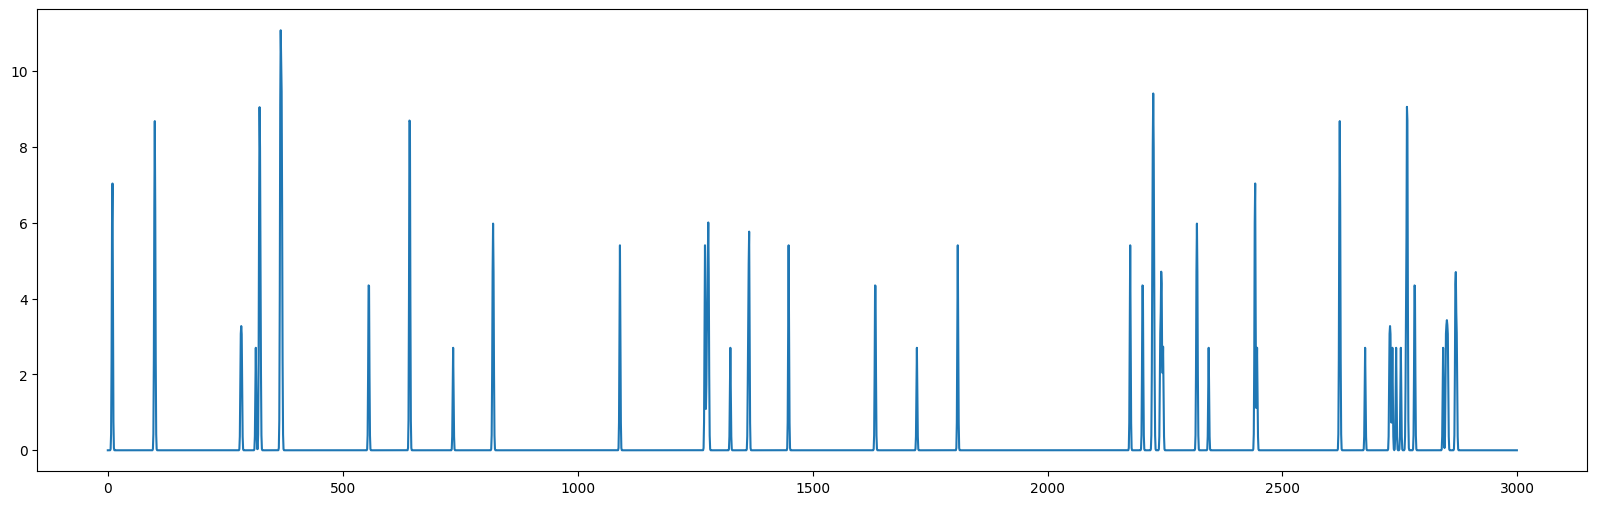

In [31]:
selected_channel = 0
subset_df.iloc[:, selected_channel].plot(figsize=(20, 6))

In [67]:
import matplotlib.animation as animation
from IPython.display import HTML

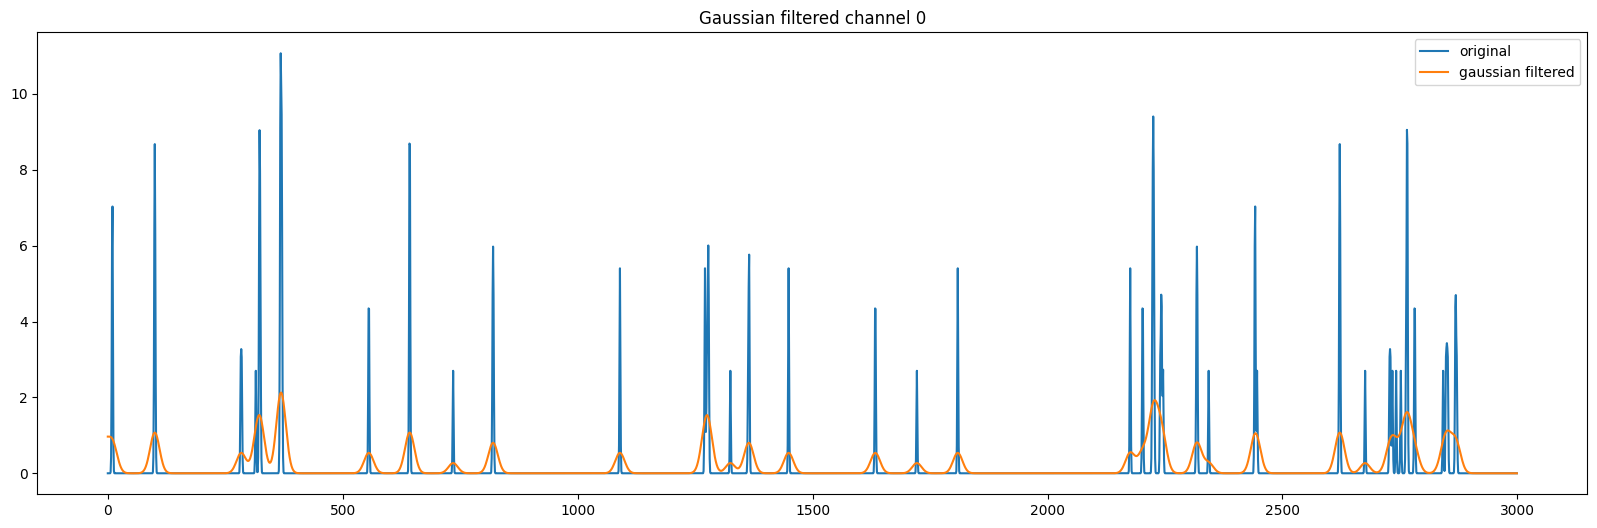

In [68]:
gaussian_filtered = gaussian_filter(subset_df.iloc[:, selected_channel], sigma=10)
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(subset_df.iloc[:, selected_channel], label='original')
ax.plot(gaussian_filtered, label='gaussian filtered')
ax.set_title(f"Gaussian filtered channel {selected_channel}")
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
# Initialize line plot
lines = []
#ax_response = ax2.plot(range(n_records), train_responses[:,response_id])
sigmas = [1, 3, 5, 7, 9, 15, 20]
for sigma in sigmas[:,-1]:
  gaussian_filtered = gaussian_filter(subset_df.iloc[:, selected_channel], sigma=3)
  ax.plot(subset_df.iloc[:, selected_channel], label='original')
  line = ax.plot(gaussian_filtered, label='gaussian filtered')
  lines.append(line)

def update(i, train_images, train_responses,
           ax_image, ax_response):
    ax_image.set_data(train_images[i].permute(2,1,0))
    for j, line in enumerate(lines):
      line[0].set_data(range(i), train_responses[:i])


fig.tight_layout()
# plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.2),
#           fancybox=True, shadow=True, ncol=7)
ani = animation.FuncAnimation(fig, update, len(sigmas),
                              fargs=[train_images, train_responses, ax_image, lines],
                              interval=100, blit=True)

#ani.save('test.gif')
HTML(ani.to_jshtml())

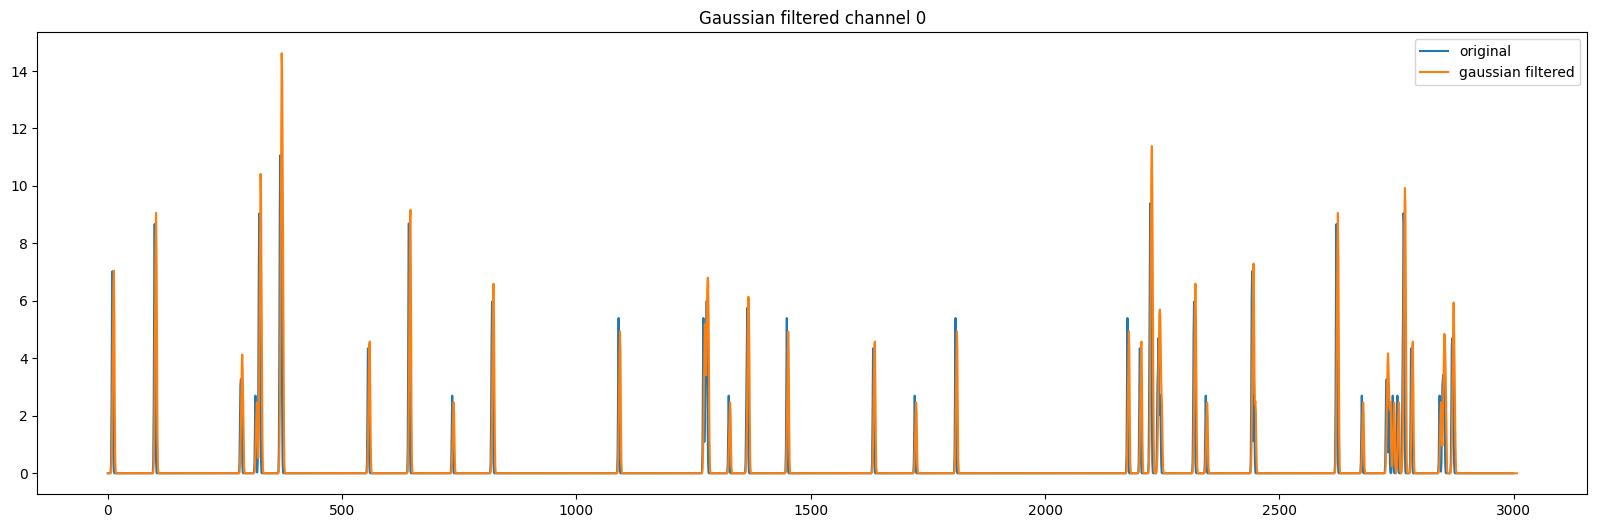

In [65]:
dx = 1
sigma = 2
data = subset_df.iloc[:, selected_channel]
x = np.arange(0, 31, dx)
gx = np.arange(-2*sigma, 2*sigma, dx)
gaussian = np.exp(-(x/sigma)**2/2)
gaussian_filtered = np.convolve(data, np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0, 0, 0, 0]), mode="full")

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(data, label='original')
ax.plot(gaussian_filtered, label='gaussian filtered')
ax.set_title(f"Gaussian filtered channel {selected_channel}")
plt.legend()

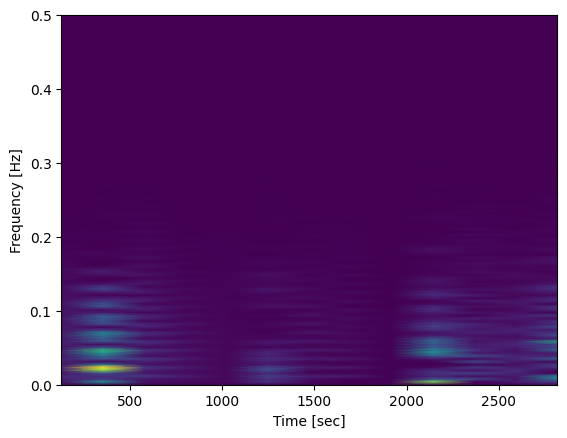

In [44]:
fs = 1
f, t, Sxx = spectrogram(subset_df.iloc[:, selected_channel], fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()